<h1 style="text-align: center;">Working Time Series Data</h1>

<img src='time_series_animation.gif'/>

## What is Time Series Data?

A series of values of a quantity obtained at successive times, often with __equal intervals__ between them.

What are some examples?
- The temperature of July recorded daily
- The weekly average price of a stock in the past year 
- The average annual government budget in the past 30 years

We will put our focus on *univariate time series*, which records a single observation, or variable, at different but equal time intervals. 


Now that we know a little bit about time series data, what are some of the characteristics of it? The most notable characteristics in time series data are the patterns that could emerge, specifically, *trends* and *seasonality*. 
- Trend:
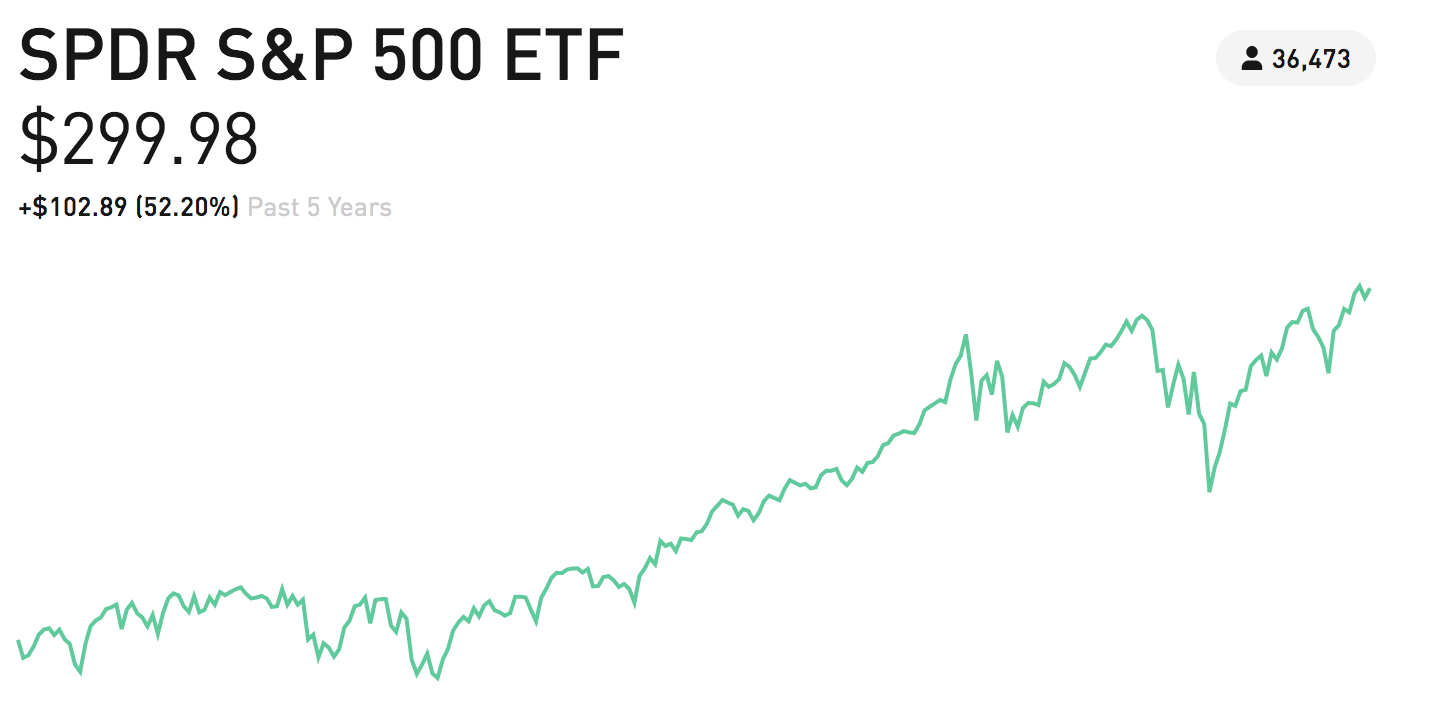

- Seasonality:
patterns that occur as a function of specific seasons. It is the variations that occur at specific regular intervals less than a year, such as quartly, hourly, or weekly. What are some examples that would manifest seasonal pattern?

An important pattern in time series that occur is __stationarity__, which is an assumption that lays the foundations for time series forecasting and modeling. 

## Stationarity 

#### What is stationary data? 

Stationary data is data in which summary statistics (mean, variance, covariance) are not a function of time

the value of the series does not change as a function over time
- is not dependent on time


<h3 style="text-align: center;">Constant Mean</p>

<img src='mean_nonstationary.webp'/>

<h3 style="text-align: center;">Constant Variance</p>

<img src='variance_nonstationary.webp'/>

variablity does not change with time

<h3 style="text-align: center;">Constant Covariance</p>

<img src='covariance_nonstationary.webp'/>

the rate of change with obseervation and time 

#### Why does data to be stationary for modeling? 

Stationarity is important because without it a model describing the data will vary in accuracy at different time points. 

Stationarity also lays the foundations of the typical time series models, such as AR, MA, ARMA, AREMA. So a violation of stationarity can cause problem in prediction. 


### Testing Stationarity:
- Examining the visualization 
- Examining the summary statistics 
- The Dickey-Fuller Test

#### 1. Visually examinig the data

In [3]:
import pandas as pd
from matplotlib import pyplot
shampoo = pd.read_csv('data/shampoo.csv', header=0, usecols=[1])

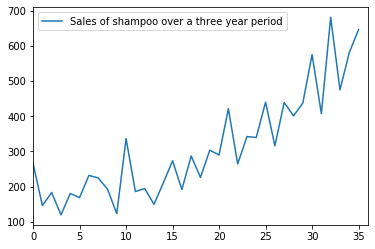

In [4]:
shampoo.plot()

#### 2. Examine summary statistics

In [5]:
from pandas import Series
import numpy as np
series = Series.from_csv('data/shampoo.csv', header=0)
X = series.values
X = X[np.logical_not(np.isnan(X))]
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

AttributeError: type object 'Series' has no attribute 'from_csv'

<h4>Dickey Fuller Test</h4>

The Dickey Fuller Test is a statistical test for testing stationarity. The Null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null hypothesis and say that the series is stationary. The Dickey Fuller test is available in stattools from the StatsModels module. 

A series of steps can be taken to stationarize your data - also known -  as removing trends (linear trends, seasonaility/periodicity, etc - more details on transformations <a href='http://people.duke.edu/~rnau/whatuse.htm'>here</a>) - we do this by taking differences of the variable over time, log transforming, or seasonal differencing.

#### Some terminology:
- Lag: for some specific point t, the observed $X_{t-i}$ (i-th period back) is called the i-th lag of $X_t$

## Differencing

We use differencing to remove your data's dependence on time (temporal dependence). 

Differencing is performed by subtracting the previous observation (lag=1) from the current observation.

difference(t) = observation(t) - observation(t-1)

__Discussion question__:
If we have a time series dataset of [1,2,3,4,5,6,7,8,9,10], and we want to difference is by lag=1, what would the result be?

In [ ]:
#### manually differencing a series!
diff_series = [Nan,1,1,1,1]

In [7]:
# create a differenced series
def difference(dataset, interval=1):
    dif f = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [8]:
shampoo['Sales of shampoo over a three year period'].values

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9,
         nan])

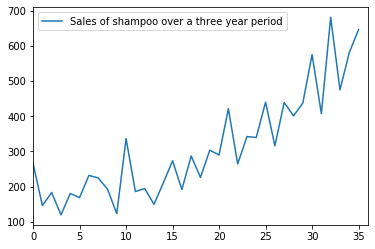

In [6]:

### Differencing using pandas/numpyt
#plot of data to see visualize trends
shampoo.plot()

In [9]:
#call .diff off a pandas/numpy series to get differenced values
diff = shampoo.diff().rename(index=str, columns={"Sales of shampoo over a three year period": "Differenced Observations"})

In [10]:
diff.head(10)

,Differenced Observations
0,NaN
1,-120.1
2,37.2
3,-63.8
4,61.0
5,-11.8
6,63.3
7,-7.3
8,-31.7
9,-69.9


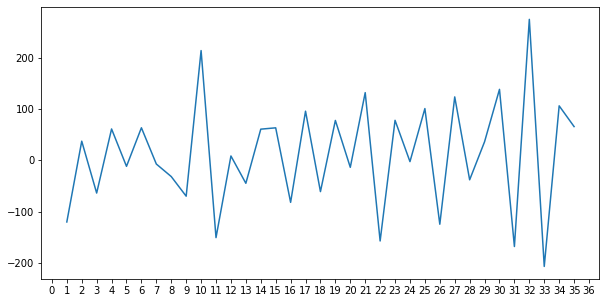

In [11]:
#plot of differenced data (more stationary)
pyplot.figure(figsize=(10,5))
pyplot.plot(diff)

Sometimes, we have to difference the differenced data (known as a second difference) to achieve stationary data. <b>The number of times we have to difference our data is the order of differencing</b> - we will use this information when building our model.

One we have achieved stationarity the next step in fitting a model to address any autocorrelation that remains in the differenced series. Time series exhbit two kinds of behaviors. Often, you can predict a value in a time series using a past value or values. Othertimes, the past values can be misleading - consider the stock market - everyday stock prices experience shock due to randomness. The effect of that shock generally diminishes quickly and has little effect on future prices. Determining which behaviors are present in our time series is essential so we can properly model the behavior. 

## Autocorrelation

#### What is autocorrleation? 

It is the correlation between one time series and the same time series shifted by k periods. 

In [12]:
shampoo_sales_lag_1 = shampoo.shift(periods=1)
shampoo_sales_lag_2 = shampoo.shift(periods=2)

No handles with labels found to put in legend.


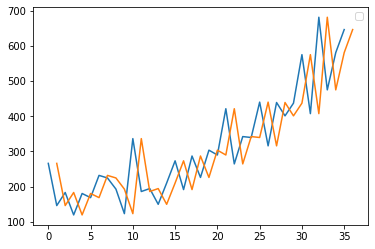

In [13]:
pyplot.plot(shampoo)
pyplot.plot(shampoo_sales_lag_1)
pyplot.legend()

No handles with labels found to put in legend.


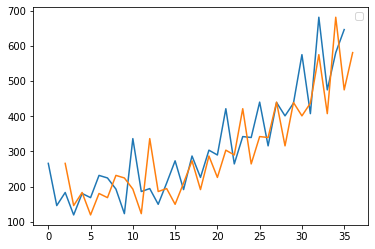

In [14]:
pyplot.plot(shampoo)
pyplot.plot(shampoo_sales_lag_2)
pyplot.legend()

#### ACF

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

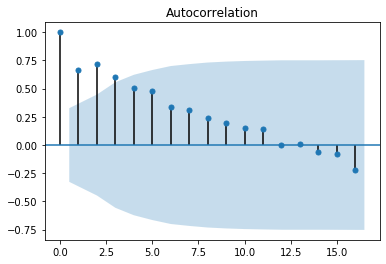

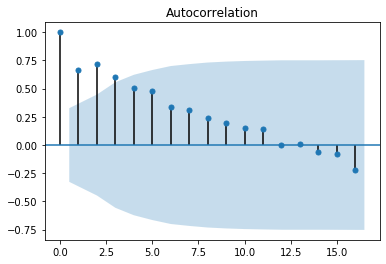

In [16]:
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(shampoo[:-1], alpha=.05)

x is the 'size of the lags'

y is the correlation 

blue area is confidence interval so if data is outside the blue area then that means that it is statistically significant

Looks like the first four lags have some pretty strong autocorrelation - note for future model building

Sometimes, autocorrelation propogates down to other lags. The influence of a strong autocorrelation causes additional lags to highly autocorrelated. To discover the true relationship between lags we can use the PACF (partial autocorrelation function) 

#### PACF

Partial autocorrelation looks at the correlation between a point and particular lag without the influence of itermediary lags. This helps us see the direct relationship between certain lags. 

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

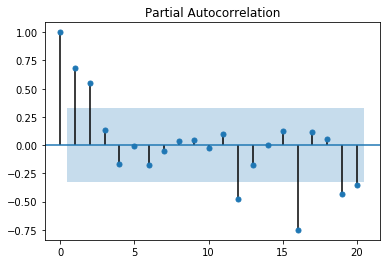

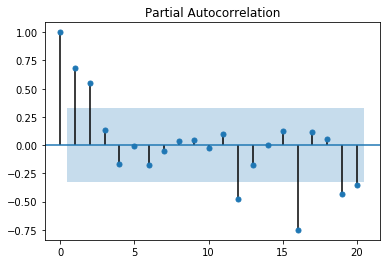

In [18]:
plot_pacf(shampoo[:-1], alpha=.05, lags=20)

Now that we now how to analyze the patterns in our time series we can procede with creating models to create forecasts!


<b>Additional Resources</b>

https://www.youtube.com/watch?v=Prpu_U5tKkE

https://newonlinecourses.science.psu.edu/stat510/node/41/
